<a href="https://colab.research.google.com/github/DanialNayyar/Titanic-Survival-Prediction/blob/main/Titanic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
titanic = pd.read_csv("/content/train (6).csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.corr()

<ipython-input-5-c1c691e9860d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: ylabel='Sex,Survived'>

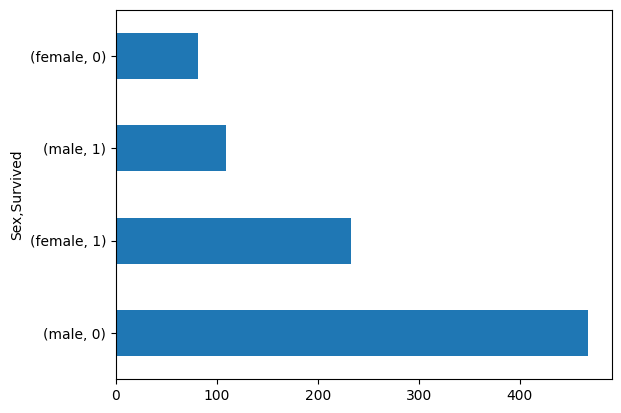

In [6]:
import matplotlib.pyplot as plt

titanic[["Sex", "Survived", ]].value_counts().plot(kind = "barh")

<Axes: ylabel='Pclass,Survived'>

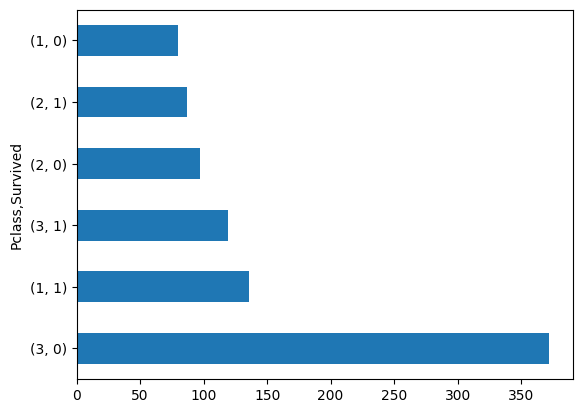

In [7]:
titanic[["Pclass", "Survived", ]].value_counts().plot(kind = "barh")

<ipython-input-8-bf8c6a133d18>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), cmap = "YlGnBu", annot = True, fmt = ".3f" ).set_title("Titanic Correlation")


Text(0.5, 1.0, 'Titanic Correlation')

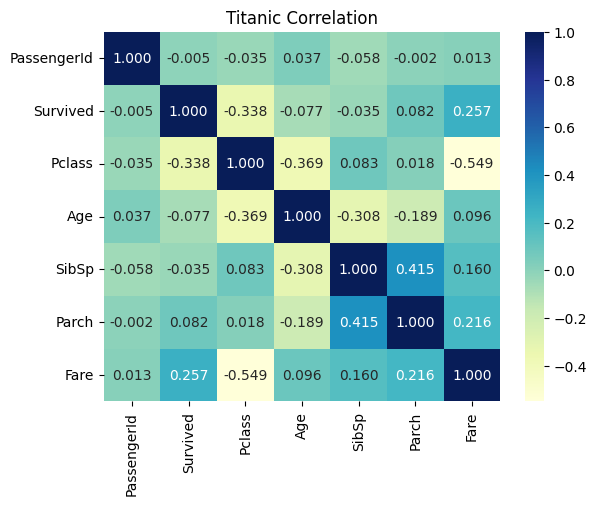

In [8]:
import seaborn as sns

sns.heatmap(titanic.corr(), cmap = "YlGnBu", annot = True, fmt = ".3f" ).set_title("Titanic Correlation")

from heat map and graphs

Survived is heavily correlated to
- Class
    -   Fare ( consequence of Class)
- Age



# Testing and Training Sets

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2)

for train_indicies, test_indicies in split.split(titanic, titanic[["Survived", "Pclass", "Sex"]]):
  strat_train_set = titanic.loc[train_indicies]
  strat_test_set = titanic.loc[test_indicies]


In [10]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 683 to 492
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          578 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [11]:
sex_matches = 0

for i in strat_train_set['Sex']:
  for j in strat_test_set["Sex"]:
    if i == j:
      sex_matches +=1
      break

sex_matches

712

In [12]:
class_matches = 0

for i in strat_train_set['Pclass']:
  for j in strat_test_set["Pclass"]:
    if i == j:
      class_matches +=1
      break

class_matches

712

Text(0.5, 1.0, 'Strat Train Set')

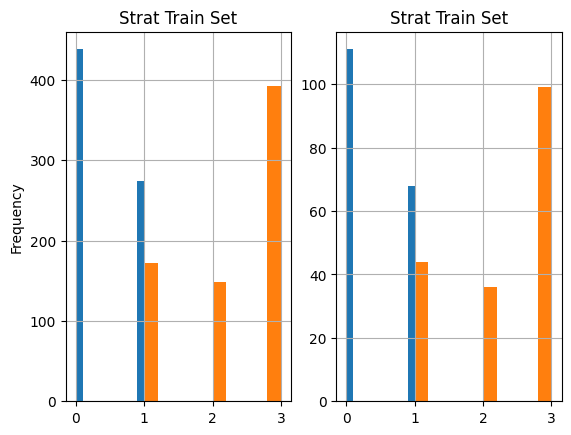

In [13]:
# Does not show how many of Pclass lived or died
# Only shows how many of survived and how many of Pclass are in each set
# should be the proportion

plt.subplot(1,2,1)
strat_train_set["Survived"].hist() #= blue
strat_train_set["Pclass"].hist() # = orange
plt.title("Strat Train Set")
plt.ylabel("Frequency")


plt.subplot(1,2,2)
strat_test_set["Survived"].hist() #= blue
strat_test_set["Pclass"].hist() #=orange
plt.title("Strat Train Set")



In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [15]:
class ImputingAge(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X


In [16]:
from sklearn.preprocessing import OneHotEncoder

class EncodingFeatures(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()

        embarked_encoded = encoder.fit_transform(X[["Embarked"]]).toarray()
        embarked_names = ["S", "Q", "C", "N"]
        for i in range(len(embarked_encoded.T)):
            X[embarked_names[i]] = embarked_encoded.T[i]

        sex_encoded = encoder.fit_transform(X[["Sex"]]).toarray()
        sex_names = ["female", "male"]
        for i in range(len(sex_encoded.T)):
            X[sex_names[i]] = sex_encoded.T[i]

        return X



In [17]:
class FeatureDrop(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")


# Pipeline

In [18]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("Age Imputer", ImputingAge()),
                     ('Feature Encoder', EncodingFeatures()),
                     ("Feature Dropper", FeatureDrop())

                     ])

In [19]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [20]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 683 to 492
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   S            712 non-null    float64
 8   Q            712 non-null    float64
 9   C            712 non-null    float64
 10  female       712 non-null    float64
 11  male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


Text(0.5, 1.0, 'Strat Train Set Correlation')

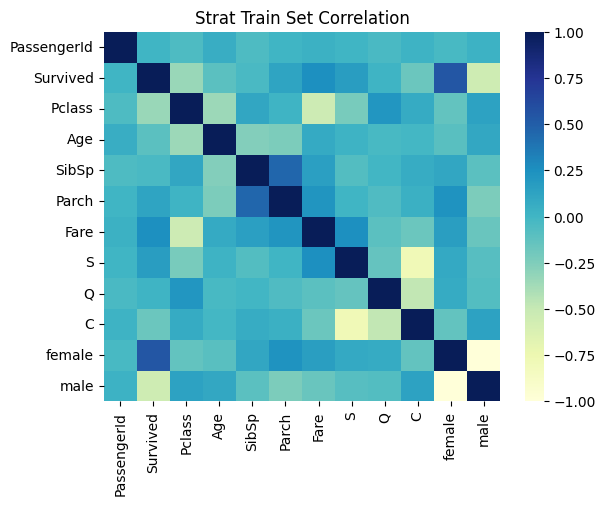

In [21]:
sns.heatmap(strat_train_set.corr(), cmap = "YlGnBu").set_title("Strat Train Set Correlation")

# Scaling Data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X = strat_train_set.drop(["Survived"], axis = 1)
y = strat_train_set["Survived"]

X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

# Model Selection

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest_clf = RandomForestClassifier()

param_grid = {
    "n_estimators":[10, 100, 250, 500],
    "max_depth": [None, 10, 15, 30],
    "min_samples_split":[2,4,6,8]

}



In [24]:
grid_search = GridSearchCV(forest_clf, param_grid, cv = 5, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 15, 30],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 100, 250, 500]},
             return_train_score=True, scoring='accuracy')

In [26]:
forest_class = grid_search.best_estimator_
forest_class

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [27]:
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}


Repeating on Strat Test Set

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [49]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 602 to 426
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          179 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
 7   S            179 non-null    float64
 8   Q            179 non-null    float64
 9   C            179 non-null    float64
 10  female       179 non-null    float64
 11  male         179 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 18.2 KB


In [54]:
X_test = strat_test_set.drop(["Survived"], axis = 1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()

X_test_data = scaler.fit_transform(X_test)
y_test_data = y_test.to_numpy()


In [55]:
print("Shape of X_test_data:", X_test_data.shape)
print("Shape of y_test_data:", y_test_data.shape)


Shape of X_test_data: (179, 11)
Shape of y_test_data: (179,)


In [59]:
score = forest_class.score(X_test_data,y_test_data)
score

0.8324022346368715

Retrain on the full Titanic Data Set


In [35]:
titanic_final = pipeline.fit_transform(titanic)
titanic_final

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,S,Q,C,female,male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [71]:
X_final = titanic_final.drop(["Survived"], axis = 1)
y_final = titanic_final["Survived"]

scaler = StandardScaler()

X_final_data = scaler.fit_transform(X_final)
y_final_data = y_final.to_numpy()

In [72]:
final_class=forest_class.score(X_final_data, y_final_data)

final_class

0.9057239057239057

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

final_class = RandomForestClassifier()

param_grid = {
    "n_estimators":[10, 100, 250, 500],
    "max_depth": [None, 10, 15, 30],
    "min_samples_split":[2,4,6,8]

}


grid_search = GridSearchCV(final_class, param_grid, cv = 5, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_final_data, y_final_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 15, 30],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 100, 250, 500]},
             return_train_score=True, scoring='accuracy')

In [74]:
print(grid_search.best_params_)

{'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 10}


In [75]:
final_class = grid_search.best_estimator_

In [76]:
titanic_kaggle_test_set = pd.read_csv("/content/test (1).csv")

In [77]:
titanic_kaggle_test_set = pipeline.fit_transform(titanic_kaggle_test_set)

In [78]:
titanic_kaggle_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   S            418 non-null    float64
 7   Q            418 non-null    float64
 8   C            418 non-null    float64
 9   female       418 non-null    float64
 10  male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [81]:
X_final_test = titanic_kaggle_test_set
X_final_test = X_final_test.fillna(method ="ffill" )


scaler = StandardScaler()


X_data_final_test =  scaler.fit_transform(X_final_test)


In [84]:
predictions = final_class.predict(X_data_final_test)

predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Create the submission data frame

In [85]:
final_df = pd.DataFrame(titanic_kaggle_test_set["PassengerId"])
final_df["Survived"] = predictions


In [88]:
final_df.to_csv("/content/predictions.csv", index = False)



In [89]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
